<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/basic_image_treatment_with_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" style="padding-right:10px;" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/university_oviedo_logo.png" width=300 px>

This notebook is from the Course "***Computer vision in the new era of Artificial Intelligence and Deep Learning***", or "*Visión por computador en la nueva era de la Inteligencia Artificial y el Deep Learning*" (ES) from the "Second quarter university extension courses" that the University of Oviedo is offering (05/04/2021 - 16/04/2021)

<[Github Repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course) | [Course Web Page Information](https://www.uniovi.es/estudios/extension/cursos2c/-/asset_publisher/SEp0PJi4ISGo/content/vision-por-computador-en-la-nueva-era-de-la-inteligencia-artificial-y-el-deep-learning?redirect=%2Festudios%2Fextension%2Fcursos2c)>

# Summary

In this notebook, we are going to see some basic image treatment. More specifically, we are going to see how to access and manipulate pixels in OpenCV with both color (BGR) images and also with grayscale images. 
Moreover, instead of downloading or using an image to show how to tackle the previous points, we are going to create the images using only numpy functions for practising some of the concepts learned in previous points related to numpy.

# Accessing, manipulating pixels in OpenCV with color images

To build a sample image, we will code the function `build_sample_image_color()`, which makes use of numpy operations to form the final image. In this case, we will use `np.zeros()`, `np.ones()` and `np.concatenate()`. 

In [76]:
import numpy as np

def build_sample_image_color(colors):
    """Builds a sample image with 50x50 regions of different colors"""

    # Initialize result with the first 50x50 region with black color
    result = np.zeros((50, 50, 3), dtype="uint8")

    # Build the image concatenating horizontally the regions:
    for color in colors:
      img = np.ones((50, 50, 3), dtype="uint8") * color
      result = np.concatenate((result, img), axis=1)

    return result

In [129]:
colors = np.array([(255,0,255),(255,0,0),(255,255,255),(0,255,0),(0,0,255),(255,255,0),(0,255,255)], dtype="uint8")
color_img = build_sample_image_color(colors)

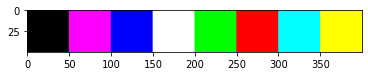

In [79]:
from matplotlib import pyplot as plt

plt.imshow(color_img[:, :, ::-1])

To get the dimensions of the image use `color_img.shape`, which returns a tuple of number of rows, columns and channels (if image is color).

In [80]:
print("The shape of the image is: '{}'".format(color_img.shape))

The shape of the image is: '(50, 400, 3)'


We can also get the dimensions in three independent variables. To get height, width and the number of channels of the input image:

In [81]:
(h, w, c) = color_img.shape
print("Dimensions of the image - height: '{}', width: '{}', channels: '{}'".format(h, w, c))

Dimensions of the image - height: '50', width: '400', channels: '3'


Total number of elements is obtained by `color_img.size`:

In [82]:
print("Total number of elements: '{}'".format(color_img.size))
print("Total number of elements: '{}'".format(h * w * c))

Total number of elements: '60000'
Total number of elements: '60000'


To print the image datatype we use `color_img.dtype`:

In [84]:
print("Image datatype: '{}'".format(color_img.dtype))

Image datatype: 'uint8'


You can access a pixel value **by row and column coordinates**, in the form of `color_img[y,x]`.

For BGR image, it returns an array of (Blue, Green, Red) values:

*   The pixel value at (y=10,x=10) should be black: (0,0,0)
*   The pixel value at (y=10,x=60) should be magenta: (255,0,255)
*   The pixel value at (y=10,x=160) should be white: (255,255,255)
*   The pixe value at (y=10,x=210) should be green: (0,255,0)
*   The pixel value at (y=10,x=260) should be red: (0,0,255)
*   The pixel value at (y=10,x=310) should be cyan: (255,255,0)
*   The pixel value at (y=10,x=360) should be yellow: (0,255,255)

Let's check it.

In [96]:
print("Pixel value at (y=10, x=10):'{}'".format(color_img[10, 10]))
print("Pixel value at (y=10, x=60):'{}'".format(color_img[10, 60]))
print("Pixel value at (y=10, x=110):'{}'".format(color_img[10, 110]))
print("Pixel value at (y=10, x=160):'{}'".format(color_img[10, 160]))
print("Pixel value at (y=10, x=210):'{}'".format(color_img[10, 210]))
print("Pixel value at (y=10, x=260):'{}'".format(color_img[10, 260]))
print("Pixel value at (y=10, x=310):'{}'".format(color_img[10, 310]))
print("Pixel value at (y=10, x=360):'{}'".format(color_img[10, 360]))

Pixel value at (y=10, x=10):'[0 0 0]'
Pixel value at (y=10, x=60):'[255   0 255]'
Pixel value at (y=10, x=110):'[255   0   0]'
Pixel value at (y=10, x=160):'[255 255 255]'
Pixel value at (y=10, x=210):'[  0 255   0]'
Pixel value at (y=10, x=260):'[  0   0 255]'
Pixel value at (y=10, x=310):'[255 255   0]'
Pixel value at (y=10, x=360):'[  0 255 255]'


We can access only one channel at a time. In this case, we will use row, column and the index of the desired channel for indexing in the form of `color_img[y,x,index]`.


In [100]:
# Get only blue value of the pixel (x=310, y=10):
b = color_img[10, 310, 0]

# Get only green value of the pixel (x=310, y=10):
g = color_img[10, 310, 1]

# Get only red value of the pixel (x=310, y=10):
r = color_img[10, 310, 2]

print("Pixel at (x=310, y=10) - blue: '{}', green: '{}', red: '{}'".format(b, g, r))

Pixel at (x=310, y=10) - blue: '255', green: '255', red: '0'


You can modify the pixel values of the image in the same way. For example, with `img[y, x] = (0, 0, 255)` the pixel value of the image `img` will be red. See, for example, how we modify the image drawing a line in cyan. See also that this line is 3 pixels height (for a better visualization).

In [130]:
for i in range(color_img.shape[1]):
  color_img[10, i] = (255, 255, 0)
  color_img[11, i] = (255, 255, 0)
  color_img[12, i] = (255, 255, 0)

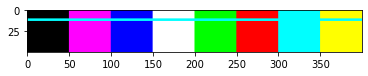

In [131]:
from matplotlib import pyplot as plt

plt.imshow(color_img[:, :, ::-1])

Sometimes, you will have to play with certain region of images rather than one pixel at a time. For example, to get only the red region of the image, we should perform as follows.

In [124]:
roi_red = color_img[0:50, 250:300]

# Check the dimensions of the image:
print(roi_red.shape)

(50, 50, 3)


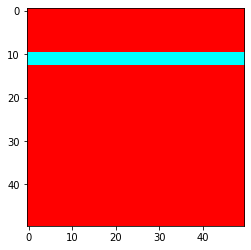

In [125]:
from matplotlib import pyplot as plt

plt.imshow(roi_red[:, :, ::-1])

In the same way, we can set more pixels than once at a time. See how we set the magenta region of the image with the new red image we have just created.

In [127]:
color_img[0:50, 50:100] = roi_red

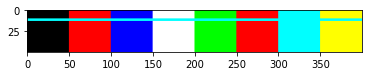

In [128]:
from matplotlib import pyplot as plt

plt.imshow(color_img[:, :, ::-1])

# Accessing, manipulating pixels in OpenCV with grayscale images

To build a sample image, we will code the function `build_sample_image_grayscale()`, which makes use of numpy operations to form the final image. In this case, we will use `np.arange()`, `np.zeros()`, `np.ones()` and `np.concatenate()`.

In [106]:
import numpy as np

def build_sample_image_grayscale():
    """Builds a sample image with 50x50 regions of different tones of gray"""

    # Define the different tones.
    # The end of interval is not included
    tones = np.arange(start=50, stop=300, step=50)
    # print(tones)

    # Initialize result with the first 50x50 region with 0-intensity level
    result = np.zeros((50, 50), dtype="uint8")

    # Build the image concatenating horizontally the regions:
    for tone in tones:
        img = np.ones((50, 50), dtype="uint8") * tone
        result = np.concatenate((result, img), axis=1)

    return result

In [107]:
gray_img = build_sample_image_grayscale()

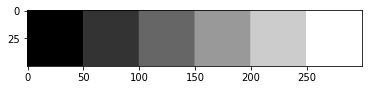

In [109]:
from matplotlib import pyplot as plt

plt.imshow(gray_img, cmap="gray")

The shape of the image is: '(50, 300)'
Dimensions of the image - height: '50', width: '300'
Total number of elements: '15000'
Total number of elements: '15000'
Image datatype: 'uint8'
Pixel value at (y=10, x=10):'255'
Pixel value at (y=10, x=60):'255'
Pixel value at (y=10, x=110):'255'


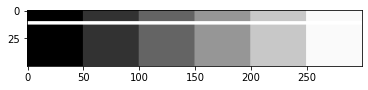

In [112]:
print("The shape of the image is: '{}'".format(gray_img.shape))
(h, w) = gray_img.shape
print("Dimensions of the image - height: '{}', width: '{}'".format(h, w))
print("Total number of elements: '{}'".format(gray_img.size))
print("Total number of elements: '{}'".format(h * w))
print("Image datatype: '{}'".format(gray_img.dtype))
print("Pixel value at (y=10, x=10):'{}'".format(gray_img[10, 10]))
print("Pixel value at (y=10, x=60):'{}'".format(gray_img[10, 60]))
print("Pixel value at (y=10, x=110):'{}'".format(gray_img[10, 110]))

for i in range(gray_img.shape[1]):
  gray_img[10, i] = 255
  gray_img[11, i] = 255
  gray_img[12, i] = 255

from matplotlib import pyplot as plt

plt.imshow(gray_img, cmap="gray")

# Conclusions

In this notebook we have seen some basic image treatment with both color (BGR) and also with grayscale images. Most of the concepts introduced in this notebook are very basic but also very important. Therefore, you should check that you have understood it to proceed further.